In [ ]:
!pip install diffusers["torch"] transformers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

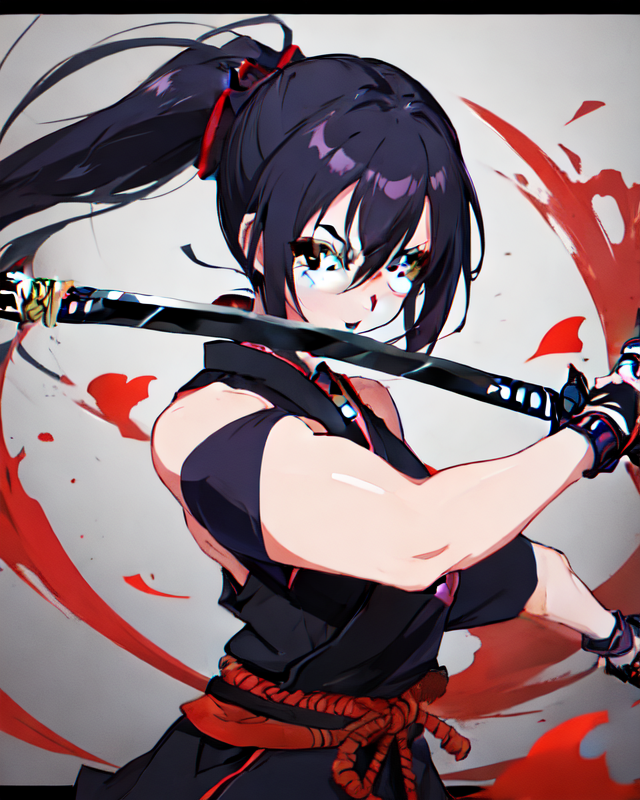

In [6]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("redstonehero/cetusmix_v4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.safety_checker = None

prompt = " Ninja Anime girl with katana in hands"
h=800
w=640
steps=25
guidance=7.5
neg = "easynegative, human, lowres, bad anatomy, bad hands, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, username, blurry, bad feet, cropped, poorly drawn hands, poorly drawn face, mutation, deformed, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, extra fingers, fewer digits, extra limbs, extra arms,extra legs, malformed limbs, fused fingers, too many fingers, long neck, cross-eyed,mutated hands, polar lowres, bad body, bad proportions, gross proportions, text, error, missing fingers, missing arms, missing legs, extra digit, extra arms, extra leg, extra foot,"

image = pipe(prompt, height=h, width=w, num_inference_steps=steps, guidance_scale=guidance, negative_prompt=neg).images[0]
image